### Bonus. Messing with a GPT Model

In lecture, we have seen the basic architecture of a transformer model:

![](https://d2l.ai/_images/transformer.svg)

Let's try to work with these components in real life!

In this final mini-lab of the semester, we would delve into a very lightweight (toy) GPT model, `distilgpt2` (Distilled-GPT2). It only contains 82 million parameters, so it would comfortably run locally just with your CPU (actual SoTA models have hundreds/thousands of billions of parameters!).

Training a model from scratch is a difficult task (and requires LOTSSS of computing resources), so we would load a **pretrained** model. We will then mess around with the weights of the model and observe how the model behaviour changes. Hopefully, this would give us a deeper understanding on how the model is internally structured.

*Note*: You will need the [`transformers` package](https://pypi.org/project/transformers/). Install it using `pip install transformers`. Note that you can't really do this on the Cocalc server since Internet access is required for you to download the model.

**Your task**: There are 4 tasks in this mini-lab. Complete them in sequence.

**Submission**: Submit your writeup and/or implementation before/during the tutorial for extra EXP!

In [3]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForCausalLM, AutoTokenizer

#### Warm-up: Loading the Model

The first code snippet downloads and loads the `distilgpt2` model from the Internet. The second code snippet runs an inference with the input text `Once upon a time`. See how the model generates a story! (about the US :0)

The third code snippet demonstrates how you could tamper with the weights of the model. The basic idea is to first extract the weights by calling the method `state_dict()`, tamper with the weights, then load it back using the method `load_state_dict()`.

Note that the following tasks will instruct you to mess around with the weights. **You should re-load the model at the beginning of each task** so that the tampered weights will not carry over.

In [4]:
model_name = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained(model_name, return_dict_in_generate=True, output_attentions=True)

In [5]:
input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors="pt", padding=True)
attention_mask = torch.ones(input_ids.shape, device=input_ids.device)

output = model.generate(input_ids, attention_mask=attention_mask, pad_token_id=tokenizer.eos_token_id, max_length=25)
tokenizer.decode(output.sequences[0], skip_special_tokens=True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1256: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


'Once upon a time of war, the United States was the only country in the world to have a military presence. The United'

In [6]:
state_dict = model.state_dict()
print("Weights:", state_dict.keys(), end="\n\n")

tensor = state_dict['transformer.h.5.attn.c_attn.bias']
print("Shape of transformer.h.5.attn.c_attn.bias:", tensor.shape, end="\n\n")

# Tamper with the 1024-th entry of the bias
tensor[1024] += 0.1
model.load_state_dict(state_dict)

Weights: odict_keys(['transformer.wte.weight', 'transformer.wpe.weight', 'transformer.h.0.ln_1.weight', 'transformer.h.0.ln_1.bias', 'transformer.h.0.attn.c_attn.weight', 'transformer.h.0.attn.c_attn.bias', 'transformer.h.0.attn.c_proj.weight', 'transformer.h.0.attn.c_proj.bias', 'transformer.h.0.ln_2.weight', 'transformer.h.0.ln_2.bias', 'transformer.h.0.mlp.c_fc.weight', 'transformer.h.0.mlp.c_fc.bias', 'transformer.h.0.mlp.c_proj.weight', 'transformer.h.0.mlp.c_proj.bias', 'transformer.h.1.ln_1.weight', 'transformer.h.1.ln_1.bias', 'transformer.h.1.attn.c_attn.weight', 'transformer.h.1.attn.c_attn.bias', 'transformer.h.1.attn.c_proj.weight', 'transformer.h.1.attn.c_proj.bias', 'transformer.h.1.ln_2.weight', 'transformer.h.1.ln_2.bias', 'transformer.h.1.mlp.c_fc.weight', 'transformer.h.1.mlp.c_fc.bias', 'transformer.h.1.mlp.c_proj.weight', 'transformer.h.1.mlp.c_proj.bias', 'transformer.h.2.ln_1.weight', 'transformer.h.2.ln_1.bias', 'transformer.h.2.attn.c_attn.weight', 'transformer.

<All keys matched successfully>

#### Task 1: Ruin the model!

As a warm-up, try to implement your own weight tampering so that the model *no longer* outputs "United States" for the input "Once upon a time". You are free to tamper anything you wish.

In [7]:
model_name = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained(model_name, return_dict_in_generate=True, output_attentions=True)

In [8]:
state_dict = model.state_dict()

# TODO: Tamper with the weights freely.

model.load_state_dict(state_dict)

<All keys matched successfully>

In [9]:
input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors="pt", padding=True)
attention_mask = torch.ones(input_ids.shape, device=input_ids.device)

output = model.generate(input_ids, attention_mask=attention_mask, pad_token_id=tokenizer.eos_token_id, max_length=25)
tokenizer.decode(output.sequences[0], skip_special_tokens=True)

'Once upon a time of war, the United States was the only country in the world to have a military presence. The United'

In [10]:
# Automated test case. Make sure you passed this.

input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors="pt", padding=True)
attention_mask = torch.ones(input_ids.shape, device=input_ids.device)

output = model.generate(input_ids, attention_mask=attention_mask, pad_token_id=tokenizer.eos_token_id, max_length=25)
output_text = tokenizer.decode(output.sequences[0], skip_special_tokens=True)

assert "United States" not in output_text, \
    "Output still contains 'United States'"

print("Test case passed!")

AssertionError: Output still contains 'United States'

#### Task 2: Once a upon time

Let's try to run another inference with the input text `Once a upon time`.

In [11]:
model_name = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained(model_name, return_dict_in_generate=True, output_attentions=True)

In [12]:
input_text = "Once a upon time"
input_ids = tokenizer.encode(input_text, return_tensors="pt", padding=True)
attention_mask = torch.ones(input_ids.shape, device=input_ids.device)

output = model.generate(input_ids, attention_mask=attention_mask, pad_token_id=tokenizer.eos_token_id, max_length=25)
tokenizer.decode(output.sequences[0], skip_special_tokens=True)

'Once a upon time, the world is a little more like a place where you can see the world.\n\n\nThe'

Notice that the model now outputs gibberish. (What does "the world is a little more like a place where you can see the world" even mean?)

The reason that the model outputs differently for these two inputs is that the tokens `a` and `upon` corresponds to different embeddings (in this model, an embedding is simply a vector of size 768, the hidden size). In addition to token embeddings, we also have position embeddings which adds in position-related information (the first token will have a different position embedding as the second token). The model adds together these two types of embeddings.

**Task**: Modify the embedding weights such that the model outputs "United States" for the input `Once a upon time`.

In [13]:
state_dict = model.state_dict()

# TODO: Tamper with the weights freely.

model.load_state_dict(state_dict)

<All keys matched successfully>

In [14]:
input_text = "Once a upon time"
input_ids = tokenizer.encode(input_text, return_tensors="pt", padding=True)
attention_mask = torch.ones(input_ids.shape, device=input_ids.device)

output = model.generate(input_ids, attention_mask=attention_mask, pad_token_id=tokenizer.eos_token_id, max_length=25)
tokenizer.decode(output.sequences[0], skip_special_tokens=True)

'Once a upon time, the world is a little more like a place where you can see the world.\n\n\nThe'

In [15]:
# Automated test case. Make sure you passed this.

input_text = "Once a upon time"
input_ids = tokenizer.encode(input_text, return_tensors="pt", padding=True)
attention_mask = torch.ones(input_ids.shape, device=input_ids.device)

output = model.generate(input_ids, attention_mask=attention_mask, pad_token_id=tokenizer.eos_token_id, max_length=25)
output_text = tokenizer.decode(output.sequences[0], skip_special_tokens=True)

assert "United States" in output_text, \
    "Output does not contain 'United States'"

print("Test case passed!")

AssertionError: Output does not contain 'United States'

#### Task 3: What is the model seeing?

We know that the GPT model utilizes the self-attention mechanism. Let's try to visualize the attention scores of the model!

Run the following cells to generate the visualization. Observe how different attention heads draw different connections between words.

In [16]:
model_name = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained(model_name, return_dict_in_generate=True, output_attentions=True)

In [17]:
input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors="pt", padding=True)
attention_mask = torch.ones(input_ids.shape, device=input_ids.device)

output = model.generate(input_ids, attention_mask=attention_mask, pad_token_id=tokenizer.eos_token_id, max_length=25)
tokenizer.decode(output.sequences[0], skip_special_tokens=True)

'Once upon a time of war, the United States was the only country in the world to have a military presence. The United'

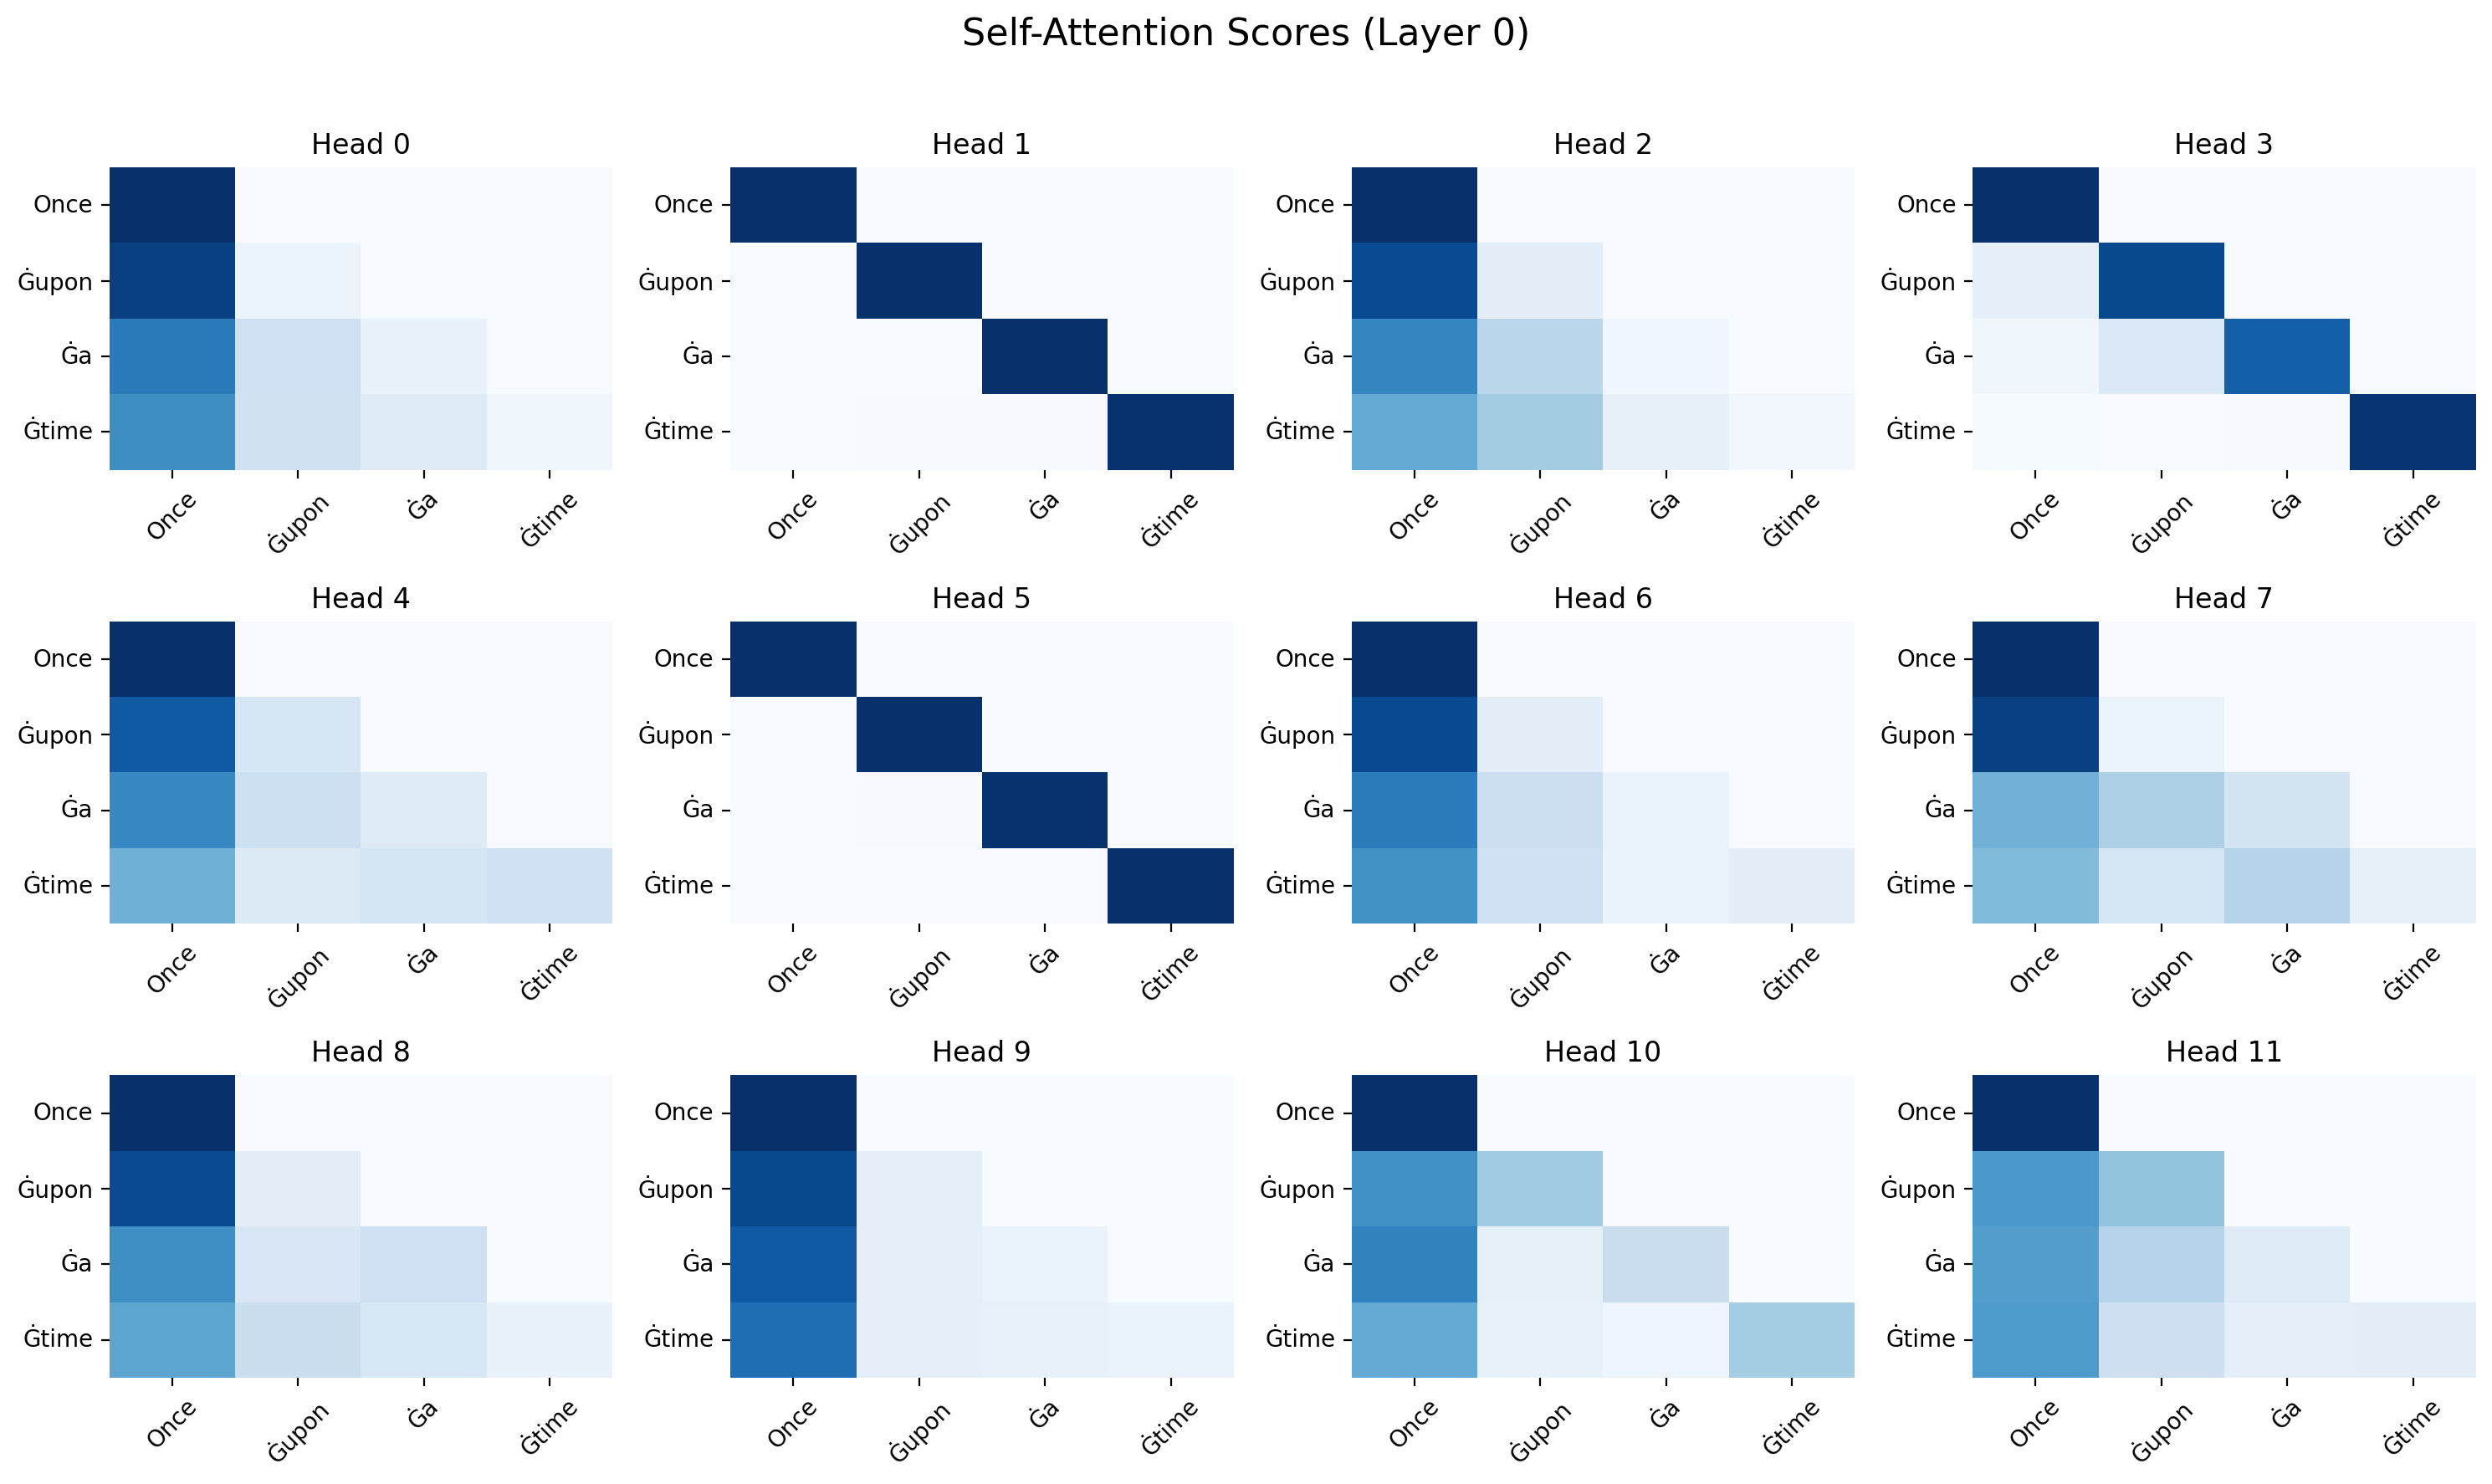

In [18]:
layer_idx = 0
attentions = output.attentions[layer_idx][0][0].cpu().numpy()

tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
num_heads = attentions.shape[0]

fig, axes = plt.subplots(3, 4, figsize=(15, 9))

for i, ax in enumerate(axes.flat):
    sns.heatmap(attentions[i], xticklabels=tokens, yticklabels=tokens, cmap="Blues", ax=ax, cbar=False)
    ax.set_title(f"Head {i}")
    ax.set_xticklabels(tokens, rotation=45)
    ax.set_yticklabels(tokens, rotation=0)

plt.suptitle(f"Self-Attention Scores (Layer {layer_idx})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Now, let's try to *remove* some of the attention heads!

We cannot really remove the attention heads by only tampering with the weights. However, recall that the attention scores are calculated using this formula:

$$\text{softmax}\left(\dfrac{\boldsymbol{Q} \boldsymbol{K}^{\top}}{\sqrt{d_k}}\right) \cdot \boldsymbol{V}$$

By zeroing out either $\boldsymbol{Q}$ or $\boldsymbol{K}$, all attention scores will essentially become the same!

**Task**: Implement this wiping by zeroing out either $\boldsymbol{Q}$ or $\boldsymbol{K}$, only for **attention heads 0 - 7 (out of the 12 attention heads) of the first layer**. Observe how the attention scores change.

*Hint 1*: You should search for the weight tensors $\boldsymbol{W}^{q}$, $\boldsymbol{W}^{k}$ and $\boldsymbol{W}^{v}$ in the list of weights above. In this model, $\boldsymbol{W}^{q}$, $\boldsymbol{W}^{k}$ and $\boldsymbol{W}^{v}$ are **concatenated** as a single tensor.  
*Hint 2*: Don't forget to wipe out the bias as well.

In [19]:
state_dict = model.state_dict()

# TODO: Tamper with the weights freely.

model.load_state_dict(state_dict)

<All keys matched successfully>

In [20]:
input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors="pt", padding=True)
attention_mask = torch.ones(input_ids.shape, device=input_ids.device)

output = model.generate(input_ids, attention_mask=attention_mask, pad_token_id=tokenizer.eos_token_id, max_length=25)

tokenizer.decode(output.sequences[0], skip_special_tokens=True)

'Once upon a time of war, the United States was the only country in the world to have a military presence. The United'

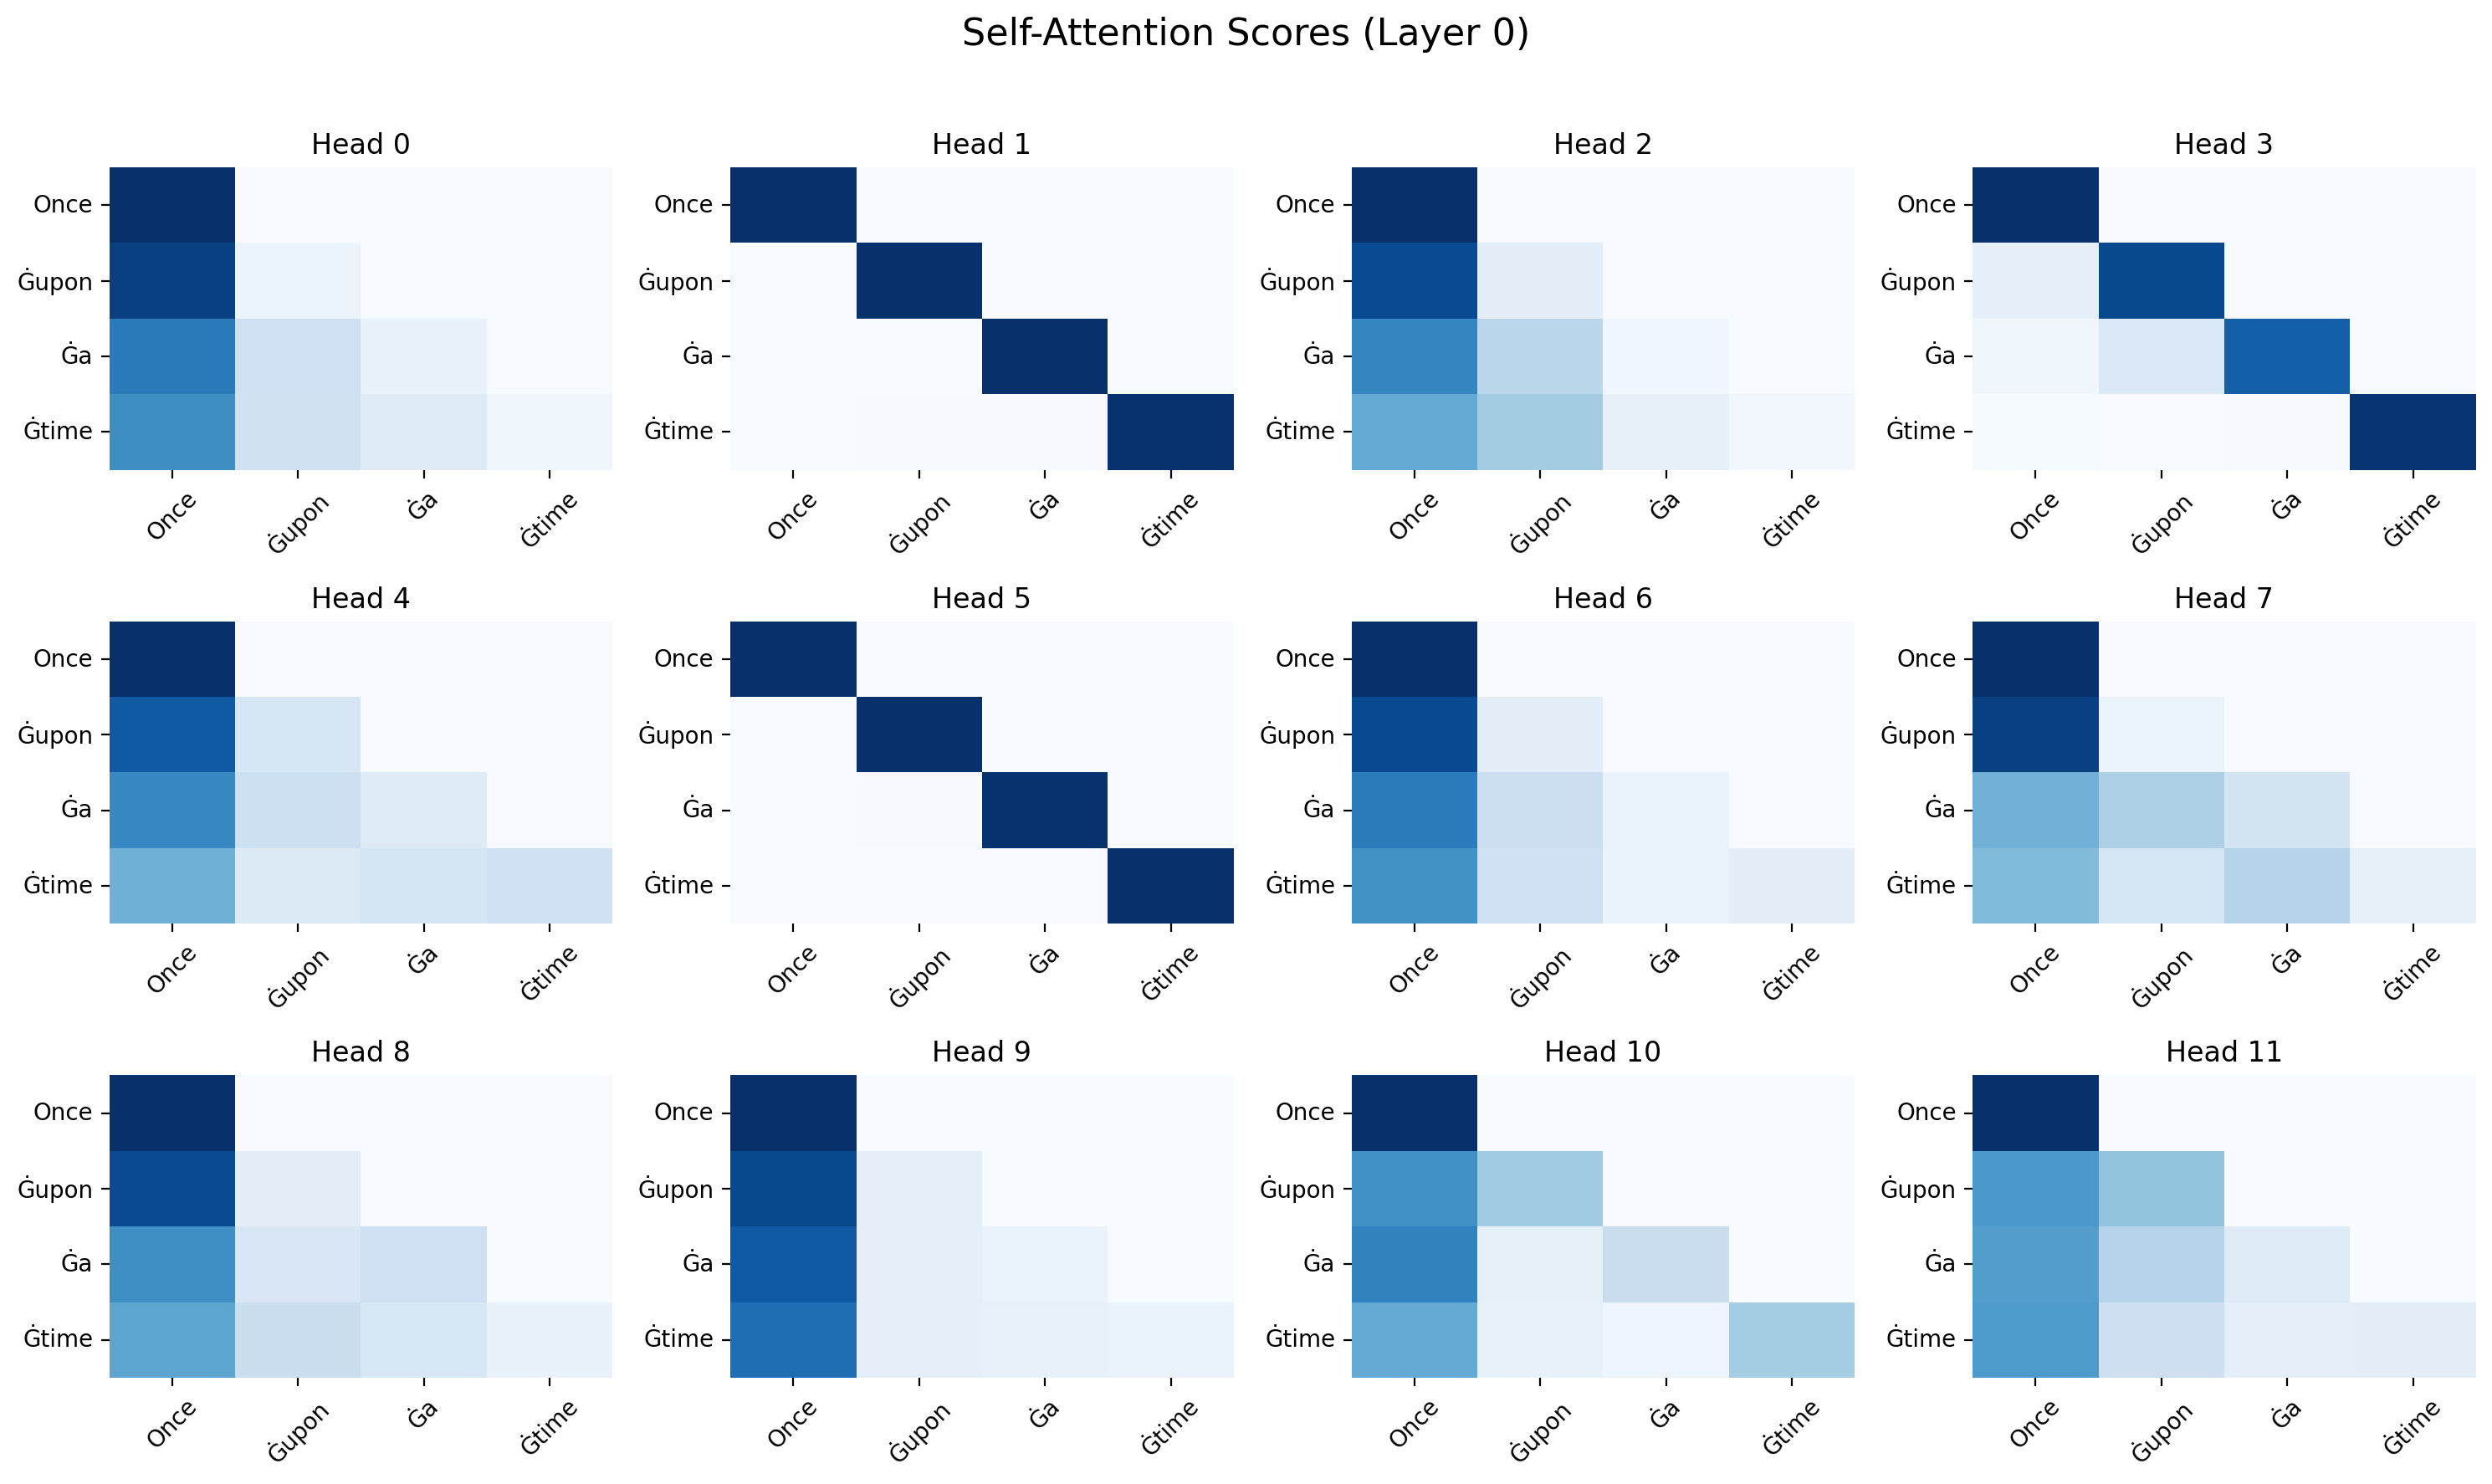

In [21]:
layer_idx = 0
attentions = output.attentions[layer_idx][0][0].cpu().numpy()

tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
num_heads = attentions.shape[0]

fig, axes = plt.subplots(3, 4, figsize=(15, 9))

for i, ax in enumerate(axes.flat):
    sns.heatmap(attentions[i], xticklabels=tokens, yticklabels=tokens, cmap="Blues", ax=ax, cbar=False)
    ax.set_title(f"Head {i}")
    ax.set_xticklabels(tokens, rotation=45)
    ax.set_yticklabels(tokens, rotation=0)

plt.suptitle(f"Self-Attention Scores (Layer {layer_idx})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [22]:
# Automated test case. Make sure you passed this.

input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors="pt", padding=True)
attention_mask = torch.ones(input_ids.shape, device=input_ids.device)

output = model.generate(input_ids, attention_mask=attention_mask, pad_token_id=tokenizer.eos_token_id, max_length=25)

attention_values = output.attentions[0][0][0]

for i in range(0, 8):
    assert torch.all(torch.isclose(output.attentions[0][0][0][i], torch.tensor(
        [[1, 0, 0, 0], [1/2, 1/2, 0, 0], [1/3, 1/3, 1/3, 0], [1/4, 1/4, 1/4, 1/4]]
    ))), f"Attention scores in head {i} is has not been wiped out"

for i in range(8, 12):
    assert not torch.all(torch.isclose(output.attentions[0][0][0][i], torch.tensor(
        [[1, 0, 0, 0], [1/2, 1/2, 0, 0], [1/3, 1/3, 1/3, 0], [1/4, 1/4, 1/4, 1/4]]
    ))), f"Attention scores in head {i} is incorrectly wiped out"

expected_text = 'Once upon a time of the year, the sun will rise and the sun will rise.\n\n\n\n\n\n\n'
output_text = tokenizer.decode(output.sequences[0], skip_special_tokens=True)
assert expected_text == output_text, "Model behaviour is different from expected"

print("Test case passed!")

AssertionError: Attention scores in head 0 is has not been wiped out

#### Task 4: Why not positional encoding?

In task 2, we swapped the locations of the tokens `a` and `upon`. You might have tried swapping the position encodings of the second and third token.

However, while the output of the model under the input `Once a upon time` changes, you might have noticed that it is not entirely same as if we gave it the prompt `Once upon a time`. This implies that other than position encoding, there are some parts of the model leveraging the positional information of the tokens.

With reference to your observations in Task 3, explain why this is the case.
